## Imports

In [11]:
from Perceptron_ import *
from evalResult_edit import *
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
import copy

%matplotlib inline

## File Paths
Specify your language

In [0]:
dataset= 'EN'
training_data_path = '%s/train' % (dataset)
validation_data_path = '%s/dev.in' % (dataset)
output_data_path = '%s/dev.p5.out' % (dataset)
test_data_path = '%s/test.in' % (dataset)
test_output_data_path = '%s/test.p5.out' % (dataset)

## Building, training and predicting using structured perceptron

In [0]:
model = Model(training_data_path, k=2)
model.readData()
model.replaceWord()
model.createEParams()
model.createTParams()
model.trainPerceptron(epochs=200, lr=1.0)
model.averageWeights()
model.predict(validation_data_path,output_data_path)

## Compute Scores

In [0]:
entity_F_score, entity_type_F_score = computeAcc('EN/dev.out','EN/dev.p5.out')
print entity_F_score, entity_type_F_score

0.681318681319 0.62443438914


### Functions

In [7]:

# Function that returns highest scores for given hyperparmeters
def findBestParam(training_data_path,dataframe, no_epochs=1, k_val=1, lr=1):
  
  model = Model(training_data_path, k=k_val)
  model.readData()
  model.replaceWord()
  model.createEParams()
  model.createTParams()
  for epoch_index in tqdm(range(no_epochs)):
      model.trainPerceptron(epochs=1, lr=lr)
      
      eParams_c = copy.deepcopy(model.eParams)
      tParams_c = copy.deepcopy(model.tParams)
      
      eParams_c,tParams_c = averageWeights(eParams_c, tParams_c, model.train_count)
      predict(validation_data_path,output_data_path,eParams_c,tParams_c, model.obsList)
      entity_F_score, entity_type_F_score = computeAcc('EN/dev.out','EN/dev.p5.out')
      dataframe.loc[epoch_index] = [entity_F_score, entity_type_F_score]
    
  dataframe.plot.line(subplots=True)
  
  max_entity = dataframe.loc[dataframe['Entity'].astype('float64').idxmax()]
  max_entity_type = dataframe.loc[dataframe['Entity Type'].astype('float64').idxmax()]
  
  print 'Highest Accuracies :'
  print max_entity
  print '-----------------------'
  print max_entity_type
  return max_entity,max_entity_type,dataframe

## Parameter Search
Parameters:
- lr 
- k 
- epochs



### __Experiment 1 : k=1__


100%|██████████| 300/300 [33:02<00:00,  6.63s/it]


Highest Accuracies :
Entity         0.707347
Entity Type    0.642590
Name: 53, dtype: float64
-----------------------
Entity         0.707347
Entity Type    0.642590
Name: 53, dtype: float64


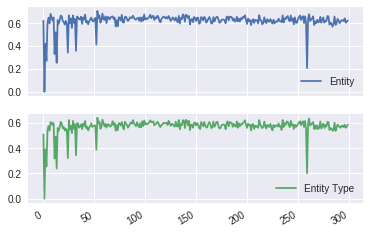

In [8]:
no_epochs = 300
k_val = 1
lr = 1

score_plot_k1 = pd.DataFrame(columns=['Entity', 'Entity Type'])
max_entity,max_entity_type,score_plot_k1 = findBestParam(score_plot_k1, no_epochs=no_epochs, k_val=k_val, lr=lr)

### __ Experiment 2 : k=2__


100%|██████████| 400/400 [26:21<00:00,  4.00s/it]


Highest Accuracies :
Entity         0.696268
Entity Type    0.637066
Name: 224, dtype: object
-----------------------
Entity         0.696268
Entity Type    0.637066
Name: 224, dtype: object


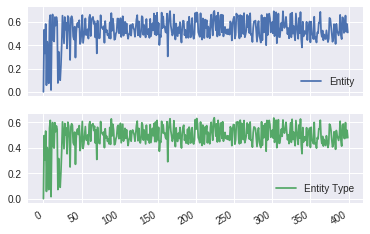

In [9]:
no_epochs = 400
k_val = 2
lr = 1

score_plot_k2 = pd.DataFrame(columns=['Entity', 'Entity Type'])
max_entity,max_entity_type,score_plot_k2 = findBestParam(score_plot_k2, no_epochs=no_epochs, k_val=k_val, lr=lr)

### Experiment 3 : k=3

100%|██████████| 300/300 [16:45<00:00,  3.37s/it]


Highest Accuracies :
Entity         0.675853
Entity Type    0.606299
Name: 227, dtype: float64
-----------------------
Entity         0.671845
Entity Type    0.616181
Name: 107, dtype: float64


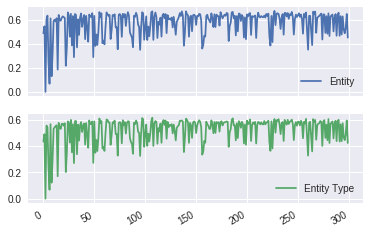

In [10]:
no_epochs = 300
k_val = 3
lr = 1

score_plot_k3 = pd.DataFrame(columns=['Entity', 'Entity Type'])
max_entity,max_entity_type,score_plot_k3 = findBestParam(score_plot_k3, no_epochs=no_epochs, k_val=k_val, lr=lr)

### Learning Rate

### Experiment 4 : lr = 0.0001

100%|██████████| 300/300 [19:59<00:00,  3.97s/it]


Highest Accuracies :
Entity         0.707599
Entity Type    0.628571
Name: 122, dtype: object
-----------------------
Entity         0.682201
Entity Type    0.629126
Name: 109, dtype: object


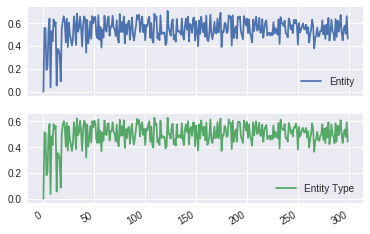

In [11]:
no_epochs = 300
k_val = 2
lr = 0.0001

score_plot_lr_1 = pd.DataFrame(columns=['Entity', 'Entity Type'])
max_entity,max_entity_type,score_plot_lr_1 = findBestParam(score_plot_lr_1, no_epochs=no_epochs, k_val=k_val, lr=lr)

## Experiment 5 : lr = 0.001

100%|██████████| 300/300 [19:52<00:00,  3.97s/it]


Highest Accuracies :
Entity         0.699937
Entity Type    0.630449
Name: 169, dtype: float64
-----------------------
Entity         0.691004
Entity Type    0.633638
Name: 180, dtype: float64


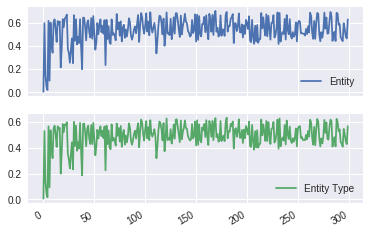

In [12]:
no_epochs = 300
k_val = 2
lr = 0.001

score_plot_lr_2 = pd.DataFrame(columns=['Entity', 'Entity Type'])
max_entity,max_entity_type,score_plot_lr_2 = findBestParam(score_plot_lr_2, no_epochs=no_epochs, k_val=k_val, lr=lr)

## Experiment 6 : lr = 0.01

100%|██████████| 300/300 [19:52<00:00,  4.04s/it]


Highest Accuracies :
Entity         0.692503
Entity Type    0.630241
Name: 170, dtype: object
-----------------------
Entity         0.681967
Entity Type    0.633443
Name: 244, dtype: object


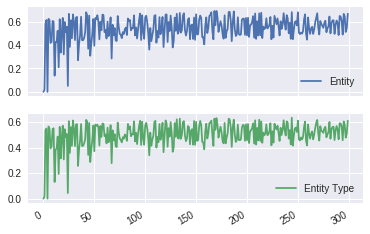

In [13]:
no_epochs = 300
k_val = 2
lr = 0.01

score_plot_lr_3 = pd.DataFrame(columns=['Entity', 'Entity Type'])
max_entity,max_entity_type,score_plot_lr_3 = findBestParam(score_plot_lr_3,no_epochs=no_epochs, k_val=k_val, lr=lr)



## Experiment 7 : lr = 0.1

100%|██████████| 300/300 [19:53<00:00,  3.97s/it]


Highest Accuracies :
Entity         0.689433
Entity Type    0.631443
Name: 276, dtype: float64
-----------------------
Entity         0.684211
Entity Type    0.636842
Name: 256, dtype: float64


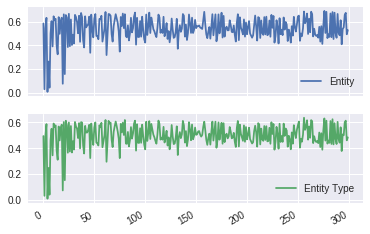

In [14]:
no_epochs = 300
k_val = 2
lr = 0.1

score_plot_lr_4 = pd.DataFrame(columns=['Entity', 'Entity Type'])
max_entity,max_entity_type,score_plot_lr_4 = findBestParam(score_plot_lr_4,no_epochs=no_epochs, k_val=k_val, lr=lr)



## Experiment 8 : lr = 0.2

100%|██████████| 300/300 [19:45<00:00,  3.99s/it]


Highest Accuracies :
Entity         0.689433
Entity Type    0.631443
Name: 276, dtype: float64
-----------------------
Entity         0.684211
Entity Type    0.636842
Name: 256, dtype: float64


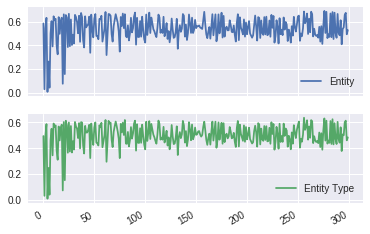

In [15]:
no_epochs = 300
k_val = 2
lr = 0.2

score_plot_lr_5 = pd.DataFrame(columns=['Entity', 'Entity Type'])
max_entity,max_entity_type,score_plot_lr_5 = findBestParam(score_plot_lr_5,no_epochs=no_epochs, k_val=k_val, lr=lr)



## Experiment 9 : lr = 0.5

100%|██████████| 300/300 [19:51<00:00,  3.88s/it]


Highest Accuracies :
Entity         0.696268
Entity Type    0.637066
Name: 224, dtype: object
-----------------------
Entity         0.696268
Entity Type    0.637066
Name: 224, dtype: object


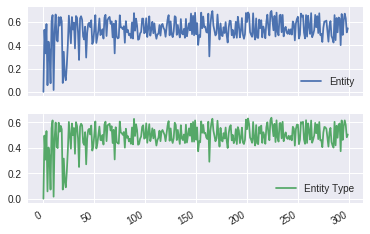

In [16]:
no_epochs =300
k_val = 2
lr = 0.5

score_plot_lr_6 = pd.DataFrame(columns=['Entity', 'Entity Type'])
max_entity,max_entity_type,score_plot_lr_6 = findBestParam(score_plot_lr_6,no_epochs=no_epochs, k_val=k_val, lr=lr)



## Experiment 10 : lr = 0.75

100%|██████████| 300/300 [19:48<00:00,  3.94s/it]


Highest Accuracies :
Entity         0.695373
Entity Type    0.637532
Name: 224, dtype: object
-----------------------
Entity         0.695373
Entity Type    0.637532
Name: 224, dtype: object


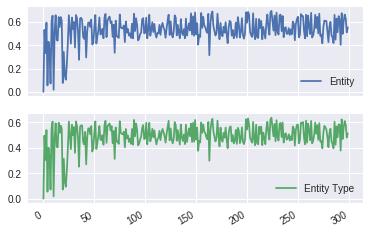

In [17]:
no_epochs = 300
k_val = 2
lr = 0.75

score_plot_lr_7 = pd.DataFrame(columns=['Entity', 'Entity Type'])
max_entity,max_entity_type,score_plot_lr_7 = findBestParam(score_plot_lr_7,no_epochs=no_epochs, k_val=k_val, lr=lr)



## French

In [12]:
dataset= 'FR'
training_data_path = '%s/train' % (dataset)
validation_data_path = '%s/dev.in' % (dataset)
output_data_path = '%s/dev.p5.out' % (dataset)
test_data_path = '%s/test.in' % (dataset)
test_output_data_path = '%s/test.p5.out' % (dataset)


100%|██████████| 100/100 [11:33<00:00,  6.82s/it]


Highest Accuracies :
Entity         0.704786
Entity Type    0.641392
Name: 0, dtype: float64
-----------------------
Entity         0.704786
Entity Type    0.641392
Name: 0, dtype: float64


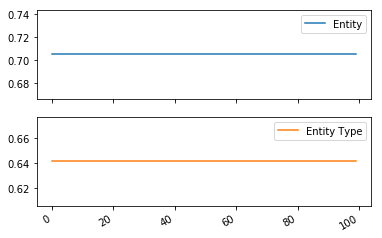

In [13]:
no_epochs = 100
k_val = 1
lr = 1

score_plot_FR = pd.DataFrame(columns=['Entity', 'Entity Type'])
max_entity,max_entity_type,score_plot_FR = findBestParam(training_data_path,score_plot_FR, no_epochs=no_epochs, k_val=k_val, lr=lr)

In [16]:
no_epochs = 100
k_val = 2
lr = 1

score_plot_FR_1 = pd.DataFrame(columns=['Entity', 'Entity Type'])
max_entity,max_entity_type,score_plot_FR_1 = findBestParam(training_data_path,score_plot_FR_1, no_epochs=no_epochs, k_val=k_val, lr=lr)

  3%|▎         | 3/100 [00:11<06:03,  3.74s/it]

KeyboardInterrupt: 

## Singlish


In [0]:
dataset= 'SG'
training_data_path = '%s/train' % (dataset)
validation_data_path = '%s/dev.in' % (dataset)
output_data_path = '%s/dev.p5.out' % (dataset)
test_data_path = '%s/test.in' % (dataset)
test_output_data_path = '%s/test.p5.out' % (dataset)

In [ ]:
no_epochs = 80
k_val = 1
lr = 1

score_plot_SG = pd.DataFrame(columns=['Entity', 'Entity Type'])
max_entity,max_entity_type,score_plot_SG = findBestParam(score_plot_SG, no_epochs=no_epochs, k_val=k_val, lr=lr)

In [0]:
no_epochs = 80
k_val = 2
lr = 1

score_plot_SG_1 = pd.DataFrame(columns=['Entity', 'Entity Type'])
max_entity,max_entity_type,score_plot_SG_1 = findBestParam(score_plot_SG_1, no_epochs=no_epochs, k_val=k_val, lr=lr)

### Chinese

In [0]:
dataset= 'CN'
training_data_path = '%s/train' % (dataset)
validation_data_path = '%s/dev.in' % (dataset)
output_data_path = '%s/dev.p5.out' % (dataset)
test_data_path = '%s/test.in' % (dataset)
test_output_data_path = '%s/test.p5.out' % (dataset)

In [0]:
no_epochs = 80
k_val = 1
lr = 1

score_plot_CN = pd.DataFrame(columns=['Entity', 'Entity Type'])
max_entity,max_entity_type,score_plot_CN = findBestParam(score_plot_CN, no_epochs=no_epochs, k_val=k_val, lr=lr)

In [0]:
no_epochs = 210
k_val = 2
lr = 1

score_plot_CN_1 = pd.DataFrame(columns=['Entity', 'Entity Type'])
max_entity,max_entity_type,score_plot_CN_1 = findBestParam(score_plot_CN_1, no_epochs=no_epochs, k_val=k_val, lr=lr)